In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% pylab inline
# load data
dataset = loadtxt("./2017_xgboost_tutorial/data/data.txt", delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

Populating the interactive namespace from numpy and matplotlib


In [17]:
print(X.shape)

(768, 8)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.33)

In [19]:
# eval_metrics = rmse, logloss, error, auc, merror, mlogloss, custom
eval_set =  [(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.817834
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.816861
[2]	validation_0-auc:0.817297
[3]	validation_0-auc:0.824913
[4]	validation_0-auc:0.823034
[5]	validation_0-auc:0.824946
[6]	validation_0-auc:0.822632
[7]	validation_0-auc:0.827026
[8]	validation_0-auc:0.824242
[9]	validation_0-auc:0.825114
[10]	validation_0-auc:0.823705
[11]	validation_0-auc:0.826557
[12]	validation_0-auc:0.826087
[13]	validation_0-auc:0.828637
[14]	validation_0-auc:0.826188
[15]	validation_0-auc:0.827261
[16]	validation_0-auc:0.824678
[17]	validation_0-auc:0.825349
[18]	validation_0-auc:0.827798
[19]	validation_0-auc:0.830213
[20]	validation_0-auc:0.829509
[21]	validation_0-auc:0.827865
[22]	validation_0-auc:0.828335
[23]	validation_0-auc:0.828771
[24]	validation_0-auc:0.828435
[25]	validation_0-auc:0.829006
[26]	validation_0-auc:0.828435
[27]	validation_0-auc:0.829173
[28]	validation_0-auc:0.828704
[29]	validation_0-auc:0.829039
Stopping. Best i

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
import xgboost


In [20]:
y_pred = model.predict_proba(X_test)
y_pred[:20]

array([ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [22]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


In [23]:
print(model.feature_importances_)

[ 0.046875    0.24479167  0.04166667  0.078125    0.04166667  0.18229167
  0.13020833  0.234375  ]


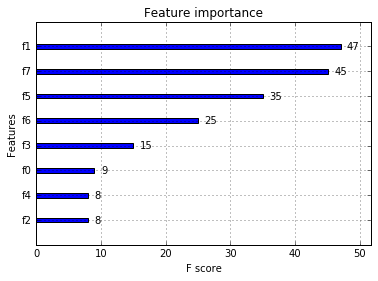

In [8]:
from xgboost import plot_importance
plot_importance(model, )
plt.show()

In [9]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

In [24]:
max_depth = [2, 4, 6, 8]
reg_lambda = [0, 1, 2]
param_grid = dict(reg_lambda=reg_lambda, max_depth=max_depth, n_estimators=[200])

In [27]:
?XGBClassifier()

In [29]:
model = XGBClassifier(objective="binary:logistic")
kfold = StratifiedKFold(y, n_folds=5, shuffle=True)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=1, cv=kfold, verbose = 1)
grid_result = grid_search.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    4.0s finished


In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.827962 using {'n_estimators': 200, 'reg_lambda': 2, 'max_depth': 2}


In [30]:
eval_set =  [(X_test, y_test)]
colsample_bytree = 0.7
model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.817834
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.816861
[2]	validation_0-auc:0.817297
[3]	validation_0-auc:0.824913
[4]	validation_0-auc:0.823034
[5]	validation_0-auc:0.824946
[6]	validation_0-auc:0.822632
[7]	validation_0-auc:0.827026
[8]	validation_0-auc:0.824242
[9]	validation_0-auc:0.825114
[10]	validation_0-auc:0.823705
[11]	validation_0-auc:0.826557
[12]	validation_0-auc:0.826087
[13]	validation_0-auc:0.828637
[14]	validation_0-auc:0.826188
[15]	validation_0-auc:0.827261
[16]	validation_0-auc:0.824678
[17]	validation_0-auc:0.825349
[18]	validation_0-auc:0.827798
[19]	validation_0-auc:0.830213
[20]	validation_0-auc:0.829509
[21]	validation_0-auc:0.827865
[22]	validation_0-auc:0.828335
[23]	validation_0-auc:0.828771
[24]	validation_0-auc:0.828435
[25]	validation_0-auc:0.829006
[26]	validation_0-auc:0.828435
[27]	validation_0-auc:0.829173
[28]	validation_0-auc:0.828704
[29]	validation_0-auc:0.829039
Stopping. Best i

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

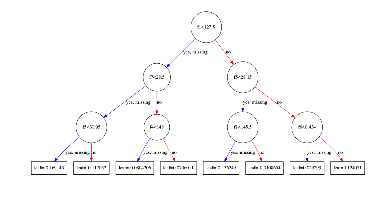

In [31]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plot_tree(model, num_trees=1)
# plt.title("max_depth = 100, with gamma = 10")
# plt.savefig("tree_with_max_depth_gamma", dpi = 700)

## Reference for XGBoost

[Well explained for Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

[Analytic vidhya parameter tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
[How parralle xgboost work](http://zhanpengfang.github.io/418home.html)

[How to tune gamma](https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6)

[slides for xgboost by tqchen](http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)

[slides for xgboost by kaggle winner](https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author)

[xgboost 理論與參數介紹](http://odjt9j2ec.bkt.clouddn.com/xgboost-xgboost%E5%AF%BC%E8%AF%BB%E5%92%8C%E5%AE%9E%E6%88%98.pdf)
